# Analysis of Pix2Pix

---



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd "drive/My Drive/Research/GAN/"

/content/drive/My Drive/Research/GAN


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
%tensorflow_version 1.x
!pip install keras===2.0.9
#!pip install tensorflow-gpu==1.4.0
#!pip install --ignore-installed --upgrade \ https://github.com/mind/wheels/releases/download/tf1.4-gpu-cuda9/tensorflow-1.4.0-cp36-cp36m-linux_x86_64.whl

TensorFlow 1.x selected.


In [5]:
import tensorflow as tf
import os
assert("1.15" in tf.__version__)
if tf.test.gpu_device_name(): print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else: print("Please install GPU version of TF")

import keras
assert("2.0.9" == keras.__version__)

!python --version
#resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
#tf.tpu.experimental.initialize_tpu_system(resolver)
#strategy = tf.distribute.experimental.TPUStrategy(resolver)

Default GPU Device: /device:GPU:0


Using TensorFlow backend.


Python 3.6.9


## Methods For Analysis

The following code blocks import all neccessary libararies and classes for analyzing these Image To Image GANs. Currently the metrics for evaluation are:
* Frechet Inception Distance

Each analysis class has \__str__ and analyze methods that allow the output of the models to be analyzed without being dependent on knowing what the metric itself is. 

In [6]:
from utils import *
import fid
import importlib
importlib.reload(fid)
from fid import FID

fid = FID()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
87916544/87910968 [==============================] - 8s 0us/step


## Training Pix2Pix

The current environment is set to run with Tensorflow, but this can be changed by modifying the backend to theano and changing the image_data_format to channels_first. The dataset can also be modified to be something other than the facades dataset. 

### Set Training Parameters

The code below trains and analyzes the Pix2Pix model on a given dataset. 

You can provide your own arguments to train this model by altering the d_params dictionary. These are the arguments I have set in the code block below:

* dset - Location of the dataset within the logging directory
* batch_size - Size of batch for training
* n_batch_per_epoch - Number of batches in one epoch
* model_name - Name/Location of the model within the logging directory
* epoch - Number of epochs in one saving/analyzing iteration
* do_plot - Prints model summary and plots model architecture
* image_data_format - channels_last for tensorflow backend and channels_first for theano backend
* img_dim - Dimension of the Square Image
* patch_size - Patch Size for the discriminator
* logging_dir - The directory where everything is stored (models, logs, data, figures)

To save only the latest model (rather than a unique model at each interation), set save_latest to True
* save_latest - Saves only the latest model (space efficient)

To load in a previous model, add the following arguments to d_params:

* load_model - Location of saved models or None
* load_epoch - Epoch of saved models or latest or None
* base_epoch - Base epoch for all stats and graphs (default is 0)

To analyze this model while its training, add the following arguments to d_params:

* analyze - method of analysis
* analyze_batch - batch of images to analyze
* load_analysis - Load Old Analysis (Useful when training saved models)

The code below is configured to save models in "logging_dir/models/model_name/", save figures in "logging_dir/figures/model_name/", load data from "logging_dir/data/dset/processed/", and save analysis in "logging_dir/figures/model_name/" 

In [0]:
import os
import argparse
import sys

image_data_format = "channels_last"
logging_dir = "Pix2Pix"
model = "facades"
dset = model
analyze = fid

os.environ["KERAS_BACKEND"] = "tensorflow"
import keras.backend as K
K.set_image_data_format(image_data_format)

sys.path.append("Pix2Pix/src/model/")
sys.path.append("Pix2Pix/src/utils/")

d_params = {"dset": dset,
            "generator": "upsampling",
            "batch_size": 4,
            "n_batch_per_epoch": 100,
            "nb_epoch": 400,
            "model_name": model,
            "epoch": 10,
            "nb_classes": 2,
            "do_plot": False,
            "image_data_format": image_data_format,
            "bn_mode": 2,
            "img_dim": 256,
            "use_label_smoothing": False,
            "label_flipping": 0,
            "patch_size": (64, 64),
            "use_mbd": False,
            "logging_dir": logging_dir,
            "save_latest": True,
            "load_model": model,
            "load_epoch": "latest",
            "base_epoch": 400,
            "load_analysis": "analysis.pkl",
            "analyze": None,#analyze,
            "analyze_batch": 5
            }

In [0]:
print(os.path.join(logging_dir, "models", model, "DCGAN_weights_epoch_%s.h5" % "latest"))
!ls Pix2Pix/models/facades/DCGAN_weights_epoch_latest.h5

Pix2Pix/models/facades/DCGAN_weights_epoch_latest.h5
Pix2Pix/models/facades/DCGAN_weights_epoch_latest.h5


In [0]:
import train
import models
import importlib
importlib.reload(train)
importlib.reload(models)
print(tf.__version__)
analysis = train.train(**d_params)

1.15.2




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Start training

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

396/400 [============================>.] - ETA: 1s - D logloss: 0.6604 - G tot: 6.6984 - G L1: 0.5896 - G logloss: 0.8024
Epoch 133/400, Time: 116.14257574081421
396/400 [============================>.] - ETA: 0s - D logloss: 0.6279 - G tot: 6.7815 - G L1: 0.5978 - G logloss: 0.8039
Epoch 134/400, Time: 31.252904176712036
396/400 [============================>.] - ETA: 0s - D logloss: 0.6538 - G tot: 6.6732 - G L1: 0.5885 - G logloss: 0.7882
Epoch 135/400, Time: 31.587844848632812
396/4

### Plotting Results of Live Analysis

This code block plots the analysis of a model either returned by train.train or found in an analysis pickle file. Currently two plots are included:

* Log Loss
    * Generator Loss
    * Discriminator Loss
* Frechet Inception Distance
    * Trainining FID
    * Validation FID

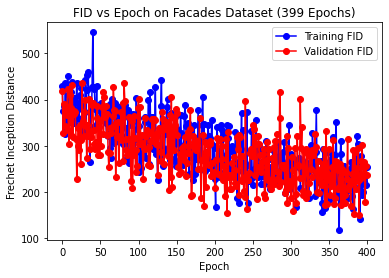

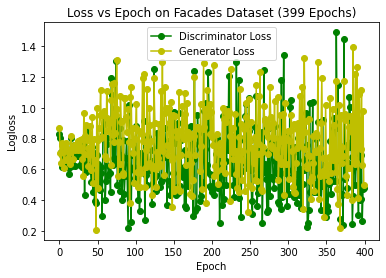

In [8]:
from matplotlib import pyplot as plt

try: assert(analysis == analysis)
except:
    try: import cPickle as pickle
    except: import pickle
    import os
    
    infile = open(os.path.join(logging_dir, "figures", model, "analysis.pkl"), "rb")
    analysis = pickle.load(infile)
    infile.close()  

x = [k for k in analysis[fid.__str__()]]
y_train = [analysis[fid.__str__()][k][0] for k in analysis[fid.__str__()]]
y_val = [analysis[fid.__str__()][k][1] for k in analysis[fid.__str__()]]
plt.plot(x, y_train, "bo-", label="Training FID")
plt.plot(x, y_val, "ro-", label="Validation FID")

plt.xlabel("Epoch")
plt.ylabel("Frechet Inception Distance")
plt.title("FID vs Epoch on %s Dataset (%d Epochs)" % (model.capitalize(), max(x)))
plt.legend()
plt.savefig(os.path.join(logging_dir, "figures", model, "fid.png"))
plt.show()

x = [k for k in analysis["disc_loss"]]
y = [analysis["disc_loss"][k] for k in analysis["disc_loss"]]
plt.plot(x, y, "go-", label="Discriminator Loss")

x = [k for k in analysis["gen_loss"]]
y = [analysis["gen_loss"][k] for k in analysis["gen_loss"]]
plt.plot(x, y, "yo-", label="Generator Loss")

plt.xlabel("Epoch")
plt.ylabel("Logloss")
plt.title("Loss vs Epoch on %s Dataset (%d Epochs)" % (model.capitalize(), max(x)))
plt.legend()
plt.savefig(os.path.join(logging_dir, "figures", model, "loss.png"))
plt.show()
#analysis["custom"]

## Analyzing Pix2Pix

The code blocks below analyze a larger sample of training, test, and validation datasets

In [9]:
import data_utils
import general_utils
import models
import importlib
importlib.reload(data_utils)
#importlib.reload(models)

#Load Data
X_full_train, X_sketch_train, X_full_val, X_sketch_val, X_full_test, X_sketch_test = data_utils.load_data(dset, image_data_format, logging_dir, include_test=True)
print("Training Dataset: %d Images" % X_full_train.shape[0])
print("Validation Dataset: %d Images" % X_full_val.shape[0])
print("Testing Dataset: %d Images" % X_full_test.shape[0])

#Load Model
img_dim = X_full_train.shape[-3:]
print("Image Dimensions %d x %d x %d" % img_dim)
nb_patch, img_dim_disc = data_utils.get_nb_patch(img_dim, d_params["patch_size"], image_data_format)
generator_model = models.load("generator_unet_%s" % d_params["generator"],
                                      img_dim,
                                      nb_patch,
                                      d_params["bn_mode"],
                                      d_params["use_mbd"],
                                      d_params["batch_size"],
                                      d_params["do_plot"],
                                      d_params["load_model"],
                                      d_params["logging_dir"],
                                      d_params["load_epoch"])

Training Dataset: 400 Images
Validation Dataset: 100 Images
Testing Dataset: 106 Images
Image Dimensions 256 x 256 x 3




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








30 images are sampled from the Training, Validation, and Testing Datasets. These images are inputted to the generator and then analyzed by the given metric. Generated batches are also plotted on image (plotted images are capped at 8) and saved in the figures directory. 

In [10]:
sample = 30
bs = d_params["batch_size"]

X_full_batch, X_sketch_batch = data_utils.gen_batch_random(X_full_train, X_sketch_train, sample)
data_utils.plot_generated_batch(X_full_batch[:bs], X_sketch_batch[:bs], generator_model,
                                                    d_params["batch_size"], image_data_format, "training",
                                                    d_params["logging_dir"], d_params["model_name"], max(x), prefix="final_batch")

X_full_batch, X_sketch_batch, X_gen_batch = data_utils.get_generated_batch(X_full_batch, X_sketch_batch, generator_model)
res = analyze.analyze(X_full_batch, X_gen_batch)
print(analyze.__str__(), "On Training Dataset:", res)

X_full_batch, X_sketch_batch = data_utils.gen_batch_random(X_full_val, X_sketch_val, sample)
data_utils.plot_generated_batch(X_full_batch[:bs], X_sketch_batch[:bs], generator_model,
                                                    d_params["batch_size"], image_data_format, "validation",
                                                    d_params["logging_dir"], d_params["model_name"], max(x), prefix="final_batch")

X_full_batch, X_sketch_batch, X_gen_batch = data_utils.get_generated_batch(X_full_batch, X_sketch_batch, generator_model)
res = analyze.analyze(X_full_batch, X_gen_batch)
print(analyze.__str__(), "On Validaiton Dataset:", res)

X_full_batch, X_sketch_batch = data_utils.gen_batch_random(X_full_test, X_sketch_test, sample)
data_utils.plot_generated_batch(X_full_batch[:bs], X_sketch_batch[:bs], generator_model,
                                                    d_params["batch_size"], image_data_format, "testing",
                                                    d_params["logging_dir"], d_params["model_name"], max(x), prefix="final_batch")

X_full_batch, X_sketch_batch, X_gen_batch = data_utils.get_generated_batch(X_full_batch, X_sketch_batch, generator_model)
res = analyze.analyze(X_full_batch, X_gen_batch)
print(analyze.__str__(), "On Testing Dataset:", res)

FID On Training Dataset: 190.74840153735653
FID On Validaiton Dataset: 178.71557228066712
FID On Testing Dataset: 211.3721480960878


The code below displays the plots of the generated images

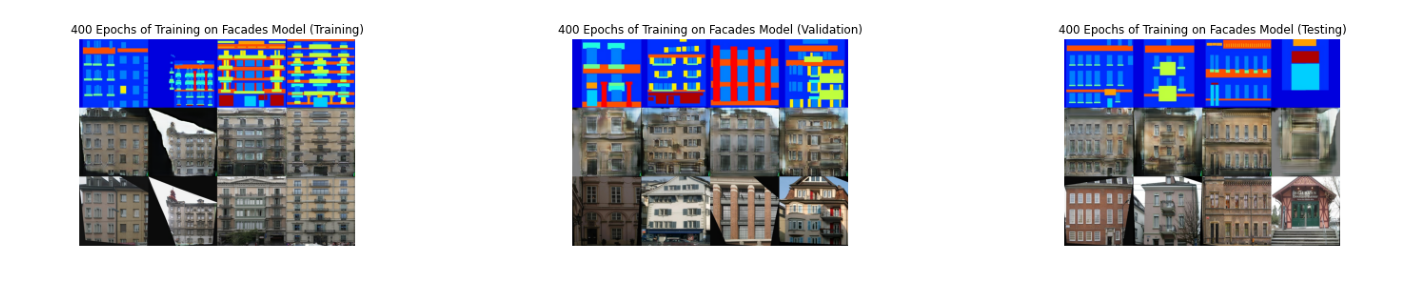

In [11]:
import cv2

fig, ax = plt.subplots(1,3,figsize=(25,6))

for a, typ in zip(ax, ["training", "validation", "testing"]):
    im = cv2.cvtColor(cv2.imread(os.path.join(d_params["logging_dir"], "figures", d_params["model_name"], "final_batch_%s.png" % (typ, ))), cv2.COLOR_RGB2BGR)
    a.axis("off")
    a.imshow(im)

plt.show()